In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import os

In [3]:
# Load dataset
df = pd.read_csv("fake_or_real_news.csv")

In [4]:
# Create binary labels
df['fake'] = df['label'].apply(lambda x: 0 if x == "REAL" else 1)

In [5]:
# Drop the original label column
df = df.drop("label", axis=1)

In [6]:
# Prepare features and labels
X, y = df['text'], df['fake']

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Create a pipeline that combines the vectorizer and the classifier
model = make_pipeline(TfidfVectorizer(stop_words="english", max_df=0.7), LinearSVC())

In [9]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_df=0.7, stop_words='english')),
                ('linearsvc', LinearSVC())])

In [10]:
# Evaluate the model
predictions = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, predictions)

In [11]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

In [12]:
# Calculate TP, TN, FP, FN
TN, FP, FN, TP = conf_matrix.ravel()

In [13]:
# Additional metrics
f1 = f1_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

In [14]:
def classify_news(text):
    prediction = model.predict([text])
    return "Fake" if prediction[0] == 1 else "Real"

In [15]:
def show_metrics():
    print("\nPerformance Metrics:")
    print(f'{"Accuracy:":<20} {accuracy:.2f}')
    print(f'{"F1 Score:":<20} {f1:.2f}')
    print(f'{"Precision:":<20} {precision:.2f}')
    print(f'{"Recall:":<20} {recall:.2f}')
    print(f'{"True Positives (TP):":<20} {TP}')
    print(f'{"True Negatives (TN):":<20} {TN}')
    print(f'{"False Positives (FP):":<20} {FP}')
    print(f'{"False Negatives (FN):":<20} {FN}')

In [16]:
def show_confusion_matrix():
    plt.figure(figsize=(10,7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()


== Welcome to the Fake News Detector ===
1. Fake News Detector
2. Confusion Matrix
3. Show Performance Metrics
4. Exit Program


Enter your choice (1/2/3/4):  3



Displaying Performance Metrics...


Performance Metrics:
Accuracy:            0.94
F1 Score:            0.94
Precision:           0.93
Recall:              0.95
True Positives (TP): 594
True Negatives (TN): 592
False Positives (FP): 47
False Negatives (FN): 34

== Welcome to the Fake News Detector ===
1. Fake News Detector
2. Confusion Matrix
3. Show Performance Metrics
4. Exit Program


Enter your choice (1/2/3/4):  1

Enter a news text to classify:
 U.S. Secretary of State John F. Kerry said Monday he will travel to Paris later this week in a gesture of American solidarity with the French people after last week’s terrorist attacks.



The news is predicted to be: Real

== Welcome to the Fake News Detector ===
1. Fake News Detector
2. Confusion Matrix
3. Show Performance Metrics
4. Exit Program


Enter your choice (1/2/3/4):  1

Enter a news text to classify:
 A famous celebrity was caught in an alien conspiracy. Sources claim that the celebrity has been working with extraterrestrial beings to control world governments.



The news is predicted to be: Fake

== Welcome to the Fake News Detector ===
1. Fake News Detector
2. Confusion Matrix
3. Show Performance Metrics
4. Exit Program


Enter your choice (1/2/3/4):  2



Displaying Confusion Matrix...



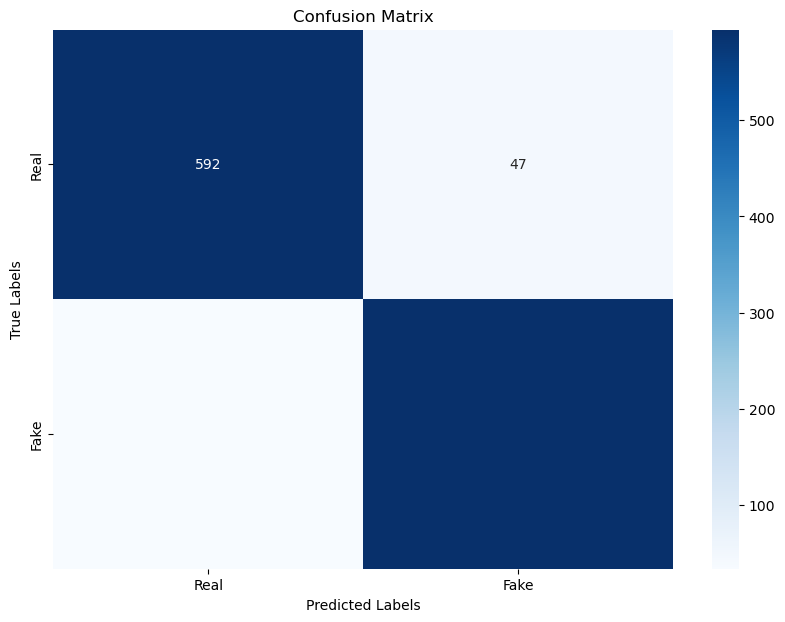


== Welcome to the Fake News Detector ===
1. Fake News Detector
2. Confusion Matrix
3. Show Performance Metrics
4. Exit Program


Enter your choice (1/2/3/4):  4


Exiting the program. Goodbye!


In [17]:
def print_menu():
    print("\n" + "="*40)
    print(" Welcome to the Fake News Detector ".center(40, '='))
    print("="*40)
    print("1. Fake News Detector")
    print("2. Confusion Matrix")
    print("3. Show Performance Metrics")
    print("4. Exit Program")
    print("="*40)
while True:
    print_menu()
    
    choice = input("Enter your choice (1/2/3/4): ").strip()
    
    if choice == '1':
        user_input = input("\nEnter a news text to classify:\n").strip()
        result = classify_news(user_input)
        print(f'\nThe news is predicted to be: {result}')
    elif choice == '2':
        print("\nDisplaying Confusion Matrix...\n")
        show_confusion_matrix()
    elif choice == '3':
        print("\nDisplaying Performance Metrics...\n")
        show_metrics()
    elif choice == '4':
        print("Exiting the program. Goodbye!")
        break
    else:
        print("Invalid choice, please try again.")